In [6]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import scipy

api = wandb.Api()
color=['blue', 'blue', 'green', 'green', 'red', 'red']


# 1. Load results from WandB

In [7]:
cora_mlp=api.run("luisawerner/nesy23/21kkd3hn").summary['test_accuracies']
cora_kenn_mlp=api.run("luisawerner/nesy23/3ro8287h").summary['test_accuracies']
cora_gcn=api.run("luisawerner/nesy23/e4g0y8u0").summary['test_accuracies']
cora_kenn_gcn=api.run("luisawerner/nesy23/1agooev5").summary['test_accuracies']
cora_gat=api.run("luisawerner/nesy23/1ip2vw3v").summary['test_accuracies']
cora_kenn_gat=api.run("luisawerner/nesy23/3ob9d8s0").summary['test_accuracies']

In [8]:
pubmed_mlp=api.run("luisawerner/ijcai23/11tzslov").summary['test_accuracies']
pubmed_kenn_mlp=api.run("luisawerner/ijcai23/1gxdt96u").summary['test_accuracies']
pubmed_gcn=api.run("luisawerner/ijcai23/yyqqkqgt").summary['test_accuracies']
pubmed_kenn_gcn=api.run("luisawerner/ijcai23/r3n99eqd").summary['test_accuracies']
# pubmed_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']
# pubmed_kenn_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']

In [9]:
citeseer_mlp=api.run("luisawerner/nesy23/6nulutmt").summary['test_accuracies']
citeseer_kenn_mlp=api.run("luisawerner/nesy23/2jhyvc06").summary['test_accuracies']
citeseer_gcn=api.run("luisawerner/nesy23/10w9ru13").summary['test_accuracies']
citeseer_kenn_gcn=api.run("luisawerner/nesy23/lsrwas08").summary['test_accuracies']
citeseer_gat = api.run("luisawerner/nesy23/2qcz3ccs").summary['test_accuracies']
citeseer_kenn_gat = api.run("luisawerner/nesy23/nfvfp6nj").summary['test_accuracies']

In [10]:
flickr_mlp=api.run("luisawerner/ijcai23/27trpunh").summary['test_accuracies']
flickr_kenn_mlp=api.run("luisawerner/ijcai23/3myuzhfp").summary['test_accuracies']
flickr_gcn=api.run("luisawerner/ijcai23/30cv2k54").summary['test_accuracies']
flickr_kenn_gcn=api.run("luisawerner/ijcai23/1w4ahs05").summary['test_accuracies']
# pubmed_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']
# pubmed_kenn_gat = api.run("luisawerner/ijcai23/26e1ecjo").summary['test_accuracies']

# 2. View Results
## Cora Dataset
Results of one-sided t-test for Cora
H1: mean test accuracy of KE_X > mean test accuracy of X
If p-value below significance threshold --> H1 true

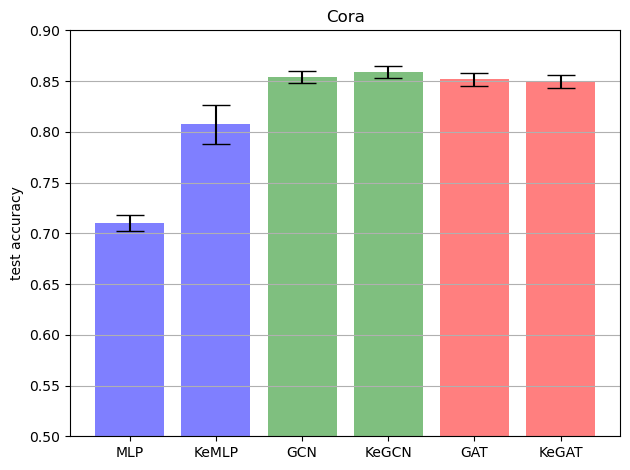

In [11]:
xpos = np.arange(6)
means = [np.mean(cora_mlp), np.mean(cora_kenn_mlp), np.mean(cora_gcn), np.mean(cora_kenn_gcn), np.mean(cora_gat), np.mean(cora_kenn_gat)]
errors = [np.std(cora_mlp), np.std(cora_kenn_mlp), np.std(cora_gcn), np.std(cora_kenn_gcn), np.std(cora_gat), np.std(cora_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Cora')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.5, 0.9)
plt.tight_layout()
plt.savefig('cora_error_bars2.png')
plt.show()

print(f'p-value KeMLP > MLP for Cora: {scipy.stats.ttest_ind(cora_kenn_mlp, cora_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Cora: {scipy.stats.ttest_ind(cora_kenn_gcn, cora_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Cora: {scipy.stats.ttest_ind(cora_kenn_gat, cora_gat, alternative="greater")[1]}')

# CiteSeer Dataset

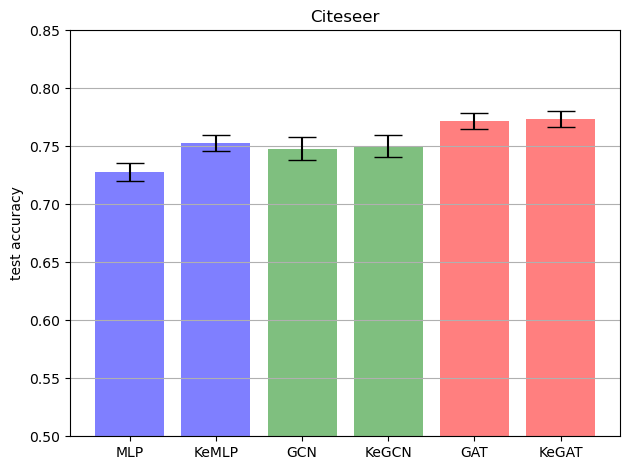

p-value KeMLP > MLP for CiteSeer: 5.236566694584563e-31
p-value KeGCN > GCN for CiteSeer: 0.09065088587292602
p-value KeGAT > GAT for CiteSeer: 0.13332461658163747


In [14]:
means = [np.mean(citeseer_mlp), np.mean(citeseer_kenn_mlp), np.mean(citeseer_gcn), np.mean(citeseer_kenn_gcn), np.mean(citeseer_gat), np.mean(citeseer_kenn_gat)]
errors = [np.std(citeseer_mlp), np.std(citeseer_kenn_mlp), np.std(citeseer_gcn), np.std(citeseer_kenn_gcn), np.std(citeseer_gat), np.std(citeseer_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Citeseer')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.5, 0.85)
plt.tight_layout()
plt.savefig('citeseer_error_bars2.png')
plt.show()

print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_mlp, citeseer_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gcn, citeseer_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gat, citeseer_gat, alternative="greater")[1]}')


In [ ]:
#flickr
# means = [np.mean(flickr_mlp), np.mean(flickr_kenn_mlp), np.mean(flickr_gcn), np.mean(flickr_kenn_gcn)]
# errors = [np.std(flickr_mlp), np.std(flickr_kenn_mlp), np.std(flickr_gcn), np.std(flickr_kenn_gcn)]
# fig, ax = plt.subplots()
# ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('test accuracy')
# ax.set_xticks(xpos)
# ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN'])
# ax.set_title('Flickr Test accuracy plot ')
# ax.yaxis.grid(True)

# Save the figure and show
# plt.ylim(0.2, 0.6)
# plt.tight_layout()
# plt.savefig('flickr_error_bars.png')
# plt.show()

#print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(flickr_kenn_mlp, flickr_mlp, alternative="greater")[1]}')
#print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(flickr_kenn_gcn, flickr_gcn, alternative="greater")[1]}')
# print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(flickr_kenn_gat, flickr_gat, alternative="greater")[1]}')


In [ ]:
# PubMed
# means = [np.mean(pubmed_mlp), np.mean(pubmed_kenn_mlp), np.mean(pubmed_gcn), np.mean(pubmed_kenn_gcn)]
# errors = [np.std(pubmed_mlp), np.std(pubmed_kenn_mlp), np.std(pubmed_gcn), np.std(pubmed_kenn_gcn)]
# fig, ax = plt.subplots()
# ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('test accuracy')
# ax.set_xticks(xpos)
# ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN'])
# ax.set_title('Pubmed Test accuracy plot ')
# ax.yaxis.grid(True)

# Save the figure and show
# plt.ylim(0.6, 1.0)
# plt.tight_layout()
# plt.savefig('pubmed_error_bars.png')
# plt.show()
#print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(pubmed_kenn_mlp, pubmed_mlp, alternative="greater")[1]}')
#print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(pubmed_kenn_gcn, pubmed_gcn, alternative="greater")[1]}')
# print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(pubmed_kenn_gat, pubmed_gat, alternative="greater")[1]}')
